In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def min_value(x):
    min_x = np.zeros(len(x)-1)
    for ii, x_i in enumerate(x[:-1]):
        min_x[ii] = abs(x[ii+1] - x[ii])
    mx = np.min(min_x)
    return mx
# uniform dx selection

def interpolation(x,y):
    mx = min_value(x) 
    dx = mx/100
    x_final = np.array([])
    y_final = np.array([])
    for ii, x_i in enumerate(x[:-1]):
        x_new = np.arange(x[ii],x[ii+1],dx) # x에서 mx가 최소가 되는 값의 / 100 을해서  dx 가 일정하게 맞춤.
        if ii >= len(x) - 2 :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new))
        else :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new),endpoint=False)
        x_final = np.append(x_final,x_new)
        y_final = np.append(y_final,y_new)
    return x_final, y_final
# Interpolation

def find_y(x,r_new,em_new): 
    dx = 0.0005
    y = np.where((r_new>= x-dx) & (r_new<= x+dx))[0]
    y_new=em_new[y].mean()
    return y_new

/tmp/ipykernel_27974/2129893944.py:28: RuntimeWarning: Mean of empty slice.
  y_new=em_new[y].mean()
/home/jin/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.034234851078397806


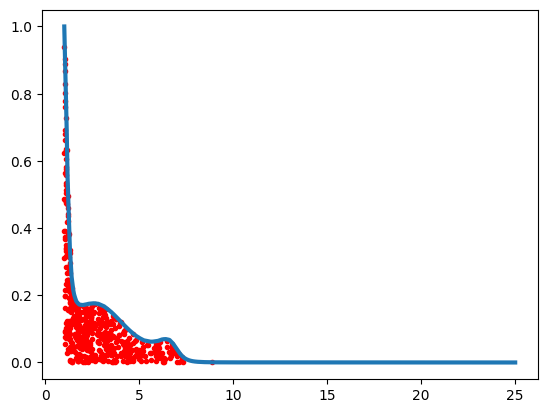

In [27]:
file = pd.read_csv('/home/jin/CIV_Photoionization/CIV_emissivity.txt',sep='\t',header=0)
file_den = pd.read_csv('/home/jin/CIV_Photoionization/CIV_number_density.txt',sep='\t',header=0)

radius,emiss= interpolation(file['Radius_kpc'].to_numpy(), file['Emissivity'].to_numpy())
radius_d,num_den= interpolation(file_den['Radius_kpc'].to_numpy(), file_den['number_density'].to_numpy())

radius_max = 25

ii = np.where(radius<=radius_max )[0]
# plt.plot(radius[ii],emiss[ii])
radius_civ, emiss_civ,num_den_civ = radius[ii],emiss[ii], num_den[ii]

Total_A = np.sum(emiss_civ)
density = emiss_civ/Total_A
# plt.plot(radius_civ,density,'ro')
name=['x','PDF']
tt = pd.DataFrame(np.column_stack((radius_civ,density)),columns=name)
tt.to_csv('/home/jin/CIV_Photoionization/PDF.txt', sep='\t', index=False)

radius_rand = []
prob= []
find_number_den=[]
x = []
y = []
z = []
reject_radius= []
reject_prob =[]
p_max = density.max()
n , loop = 0 , 0 
while (n<500 and loop < 1e6):
    loop +=1 
    r1,r2 = np.random.random(2)
    r0 = r1*radius_max
    px = find_y(r0,radius_civ,density)
    if (r2 <= px/p_max):
        n+=1
        radius_rand.append(r0)
        prob.append(r2)
        yy = find_y(r0,radius_civ,num_den_civ)
        find_number_den.append(yy)
        theta = np.random.uniform(0, 2 * np.pi)
        phi = np.arccos(np.random.uniform(-1, 1))
        x_i = r0 * np.sin(phi) * np.cos(theta)
        y_i = r0 * np.sin(phi) * np.sin(theta)
        z_i = r0 * np.cos(phi)
        x.append(x_i)
        y.append(y_i)
        z.append(z_i)
    else:
        reject_radius.append(r0)
        reject_prob.append(r2)
print(len(radius_rand)/loop)
plt.plot(radius_rand,prob,'r.')
# # plt.plot(reject_x,reject_y,'b.')
plt.plot(radius_civ,density/p_max,lw=3)

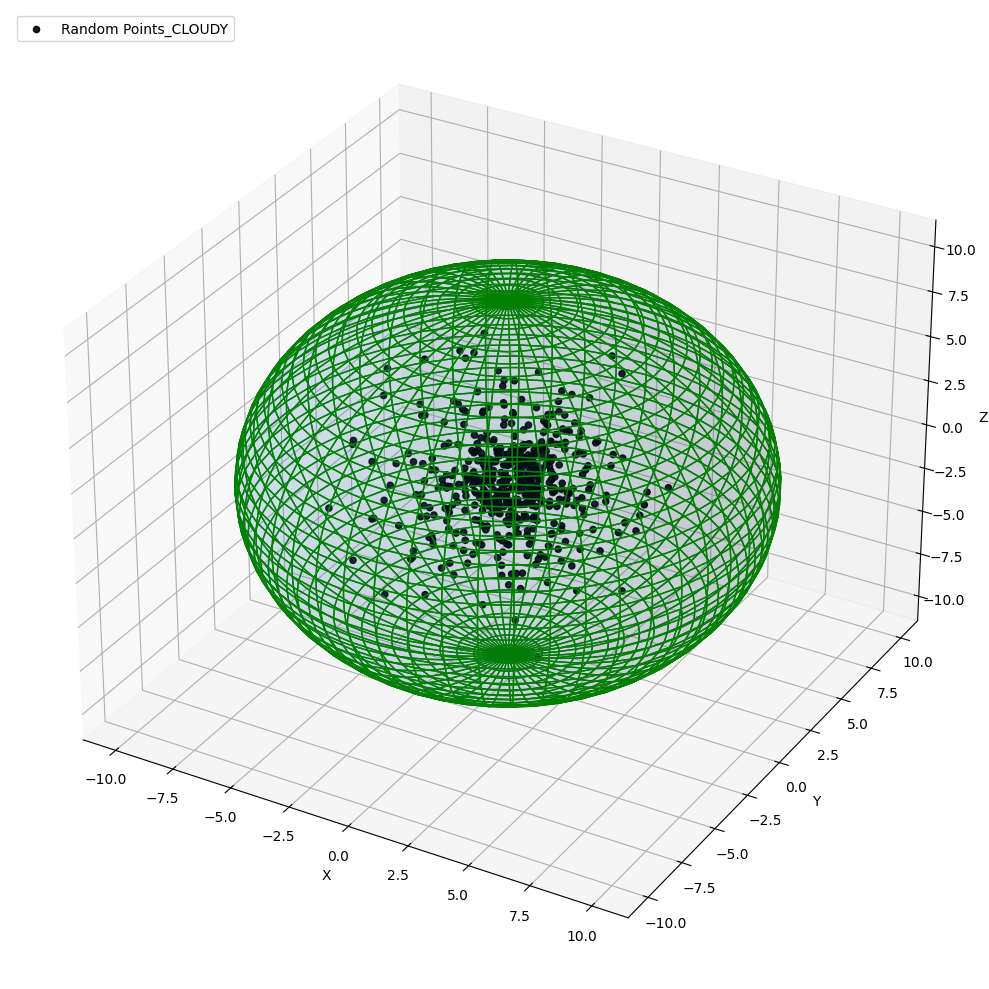

In [49]:
from mpl_toolkits.mplot3d import Axes3D

x_array = np.array(x)
y_array = np.array(y)
z_array = np.array(z)


phi = np.linspace(0, np.pi, 50)  
theta = np.linspace(0, 2 * np.pi, 50)  
phi, theta = np.meshgrid(phi, theta)

def x_y_z(radius_max,phi,theta):
    x_s = radius_max * np.sin(phi) * np.cos(theta)
    y_s = radius_max* np.sin(phi) * np.sin(theta)
    z_s = radius_max* np.cos(phi)
    return(x_s,y_s,z_s)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_array, y_array, z_array, c='k', marker='o', alpha=0.9, label="Random Points_CLOUDY")


x1,y1,z1 = x_y_z(10,phi,theta)
ax.plot_surface(x1, y1, z1, edgecolor='g', alpha=0.1)
# x1,y1,z1 = x_y_z(2,phi,theta)
# ax.plot_surface(x1, y1, z1, edgecolor='r', alpha=0.5)

# 축 설정
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend(loc='upper left')
fig.tight_layout()


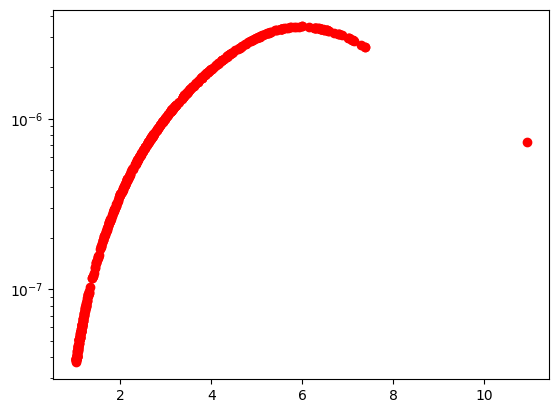

In [24]:
plt.plot(radius_rand,find_number_den,'ro')
plt.yscale('log')